In [1]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
t=np.arange(0,50,.1)
np.seterr(divide='ignore')
np.seterr(invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

$$f_{GW}(t) = B x^{−5/8} (t_c − t)^{−3/8} ,B = 16.6 s−5/8$$

In [2]:
def f(x,tc,t):
    B=16.6
    resul=np.nan_to_num(B*(x**(-5/8))*((tc-t)**(-3/8)))
    resul[abs(resul)>10**(4)]=0
    return resul
    

$$\phi(t) = 2πBx^{-5/8}(-\frac{3}{8})(t_c − t)^{5/8}$$

In [3]:
def phi(x,tc,t):
    B=16.6
    resul=np.nan_to_num(2*np.pi*B*(x**(-5/8))*(-3/8)*((tc-t)**(5/8))) 
    resul[abs(resul)>10**(4)]=0
    return resul

Plot f for chirp Mass in range (10,50) \
Plot f for different $t_c$

10


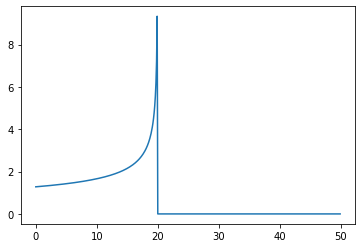

20


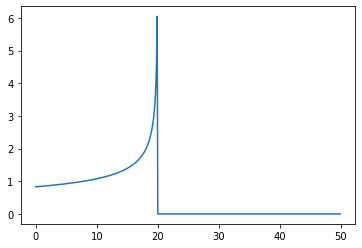

25


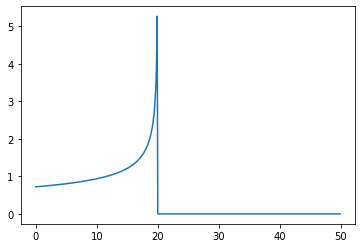

30


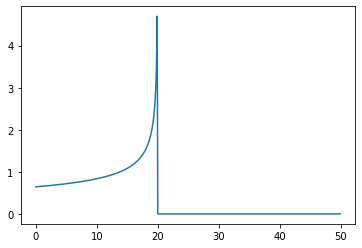

35


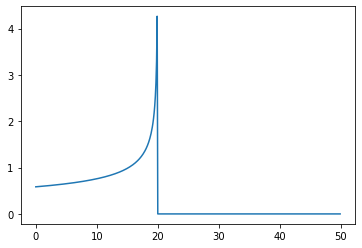

40


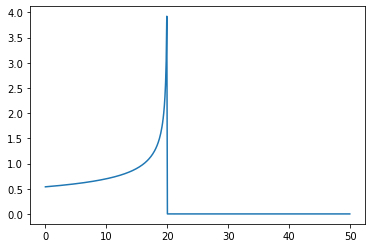

50


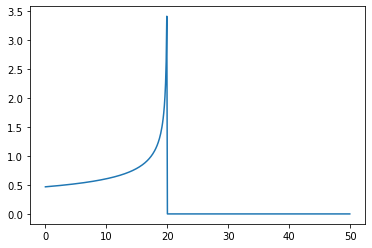

In [4]:
for x in [10,20,25,30,35,40,50]:
    tc=20
    print(x)
    plt.plot(t,f(x,tc,t))
    plt.show()

1


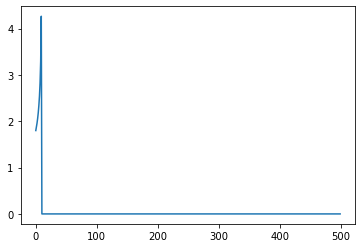

4


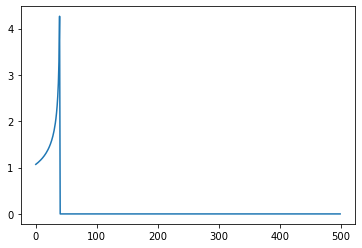

10


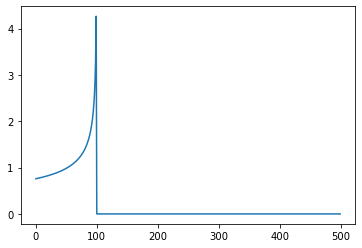

30


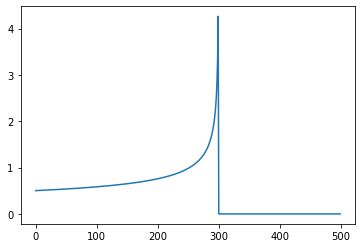

40


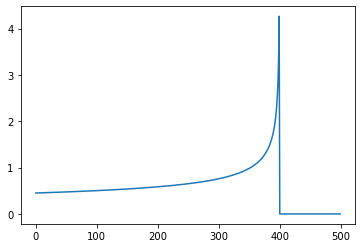

50


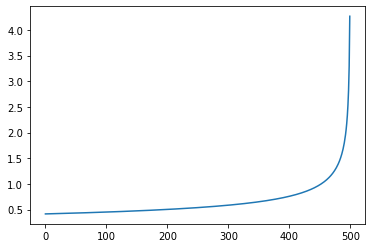

60


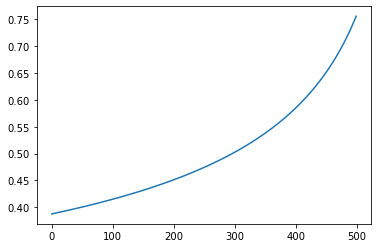

100


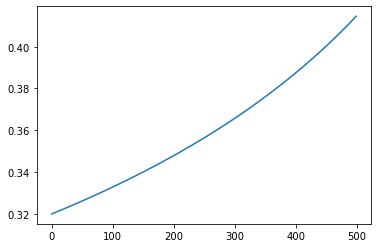

10000


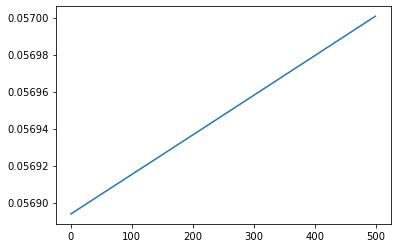

In [5]:
for tc in [1,4,10,30,40,50,60,100,10000]:
    x=35
    print(tc)
    plt.plot(f(x,tc,t))
    plt.show()

$$h(t)=[f(t)]^{2/3}cos[\phi(t)+\phi_c]$$

In [6]:
def strain(x,tc,phi_c):
    return (f(x,tc,t))**(2/3)*np.cos(phi(x,tc,t)+phi_c)
    

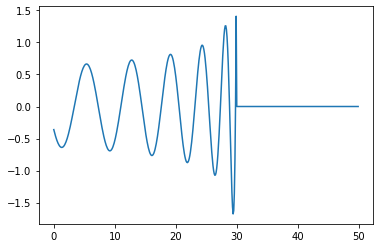

In [7]:
x=35
tc=30
phi_c=0
plt.plot(t,strain(x,tc,phi_c))


Plot for different values of $\phi_c$

[0.0]


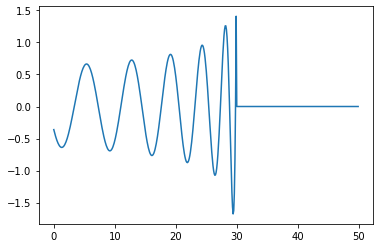

[0.5235987755982988]


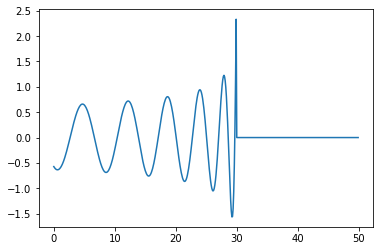

[1.0471975511965976]


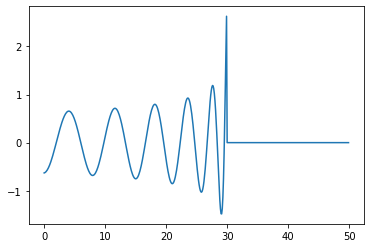

[1.5707963267948966]


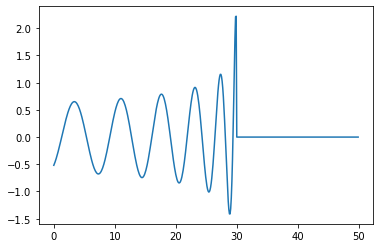

[2.0943951023931953]


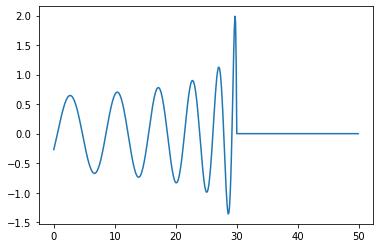

[2.6179938779914944]


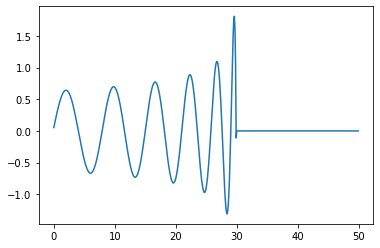

[3.141592653589793]


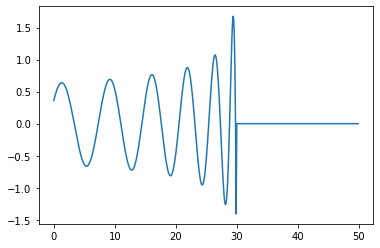

[3.665191429188092]


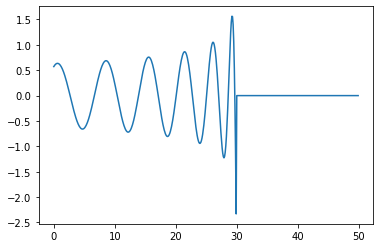

[4.1887902047863905]


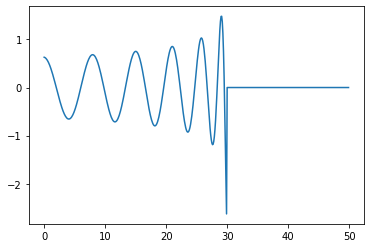

[4.71238898038469]


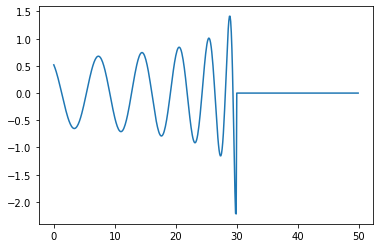

[5.235987755982989]


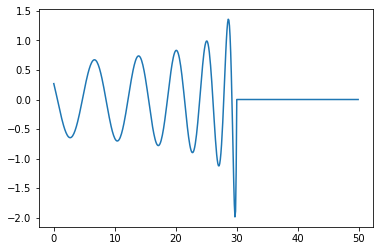

[5.759586531581287]


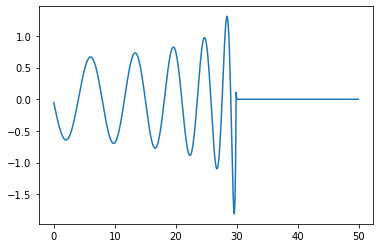

[6.283185307179586]


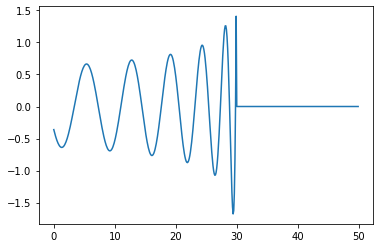

In [8]:
for i in range (13):
    phi_c=i*np.pi/6
    print([phi_c])
    plt.plot(t,strain(x,tc,phi_c))
    plt.show()

    

Prior for $\phi_c$ is uniform for values $(0,2\pi)$ \
Priot for chirp mass is uniform for values $(1,100)$


Our model can be reduced to $$h(t)\sim (t_c-t)^{-\frac{1}{4}}cos(-39.11x^{-\frac{5}{8}}(t_c-t)^{\frac{5}{8}}+\phi_c)$$

In [9]:
#random value for tc
def templ_ran(phi_c,x,t):
    tc=np.random.choice(t)
    resul=np.nan_to_num((tc-t)**(-1/4)*np.cos(phi_c-39.11*x**(-5/8)*(tc-t)**(5/8)))
    resul[abs(resul)>10**(4)]=0
    return resul
    

In [10]:
#give value for tc
def templ(phi_c,x,t,tc):
    resul=np.nan_to_num((tc-t)**(-1/4)*np.cos(phi_c-39.11*x**(-5/8)*(tc-t)**(5/8)))
    resul[abs(resul)>10**(4)]=0
    return resul
    

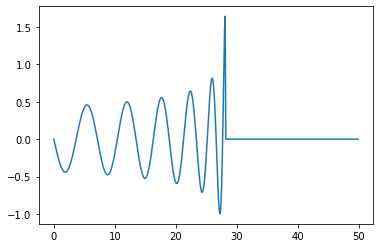

In [11]:
plt.plot(t,templ_ran(1.5,30,t))
#plt.xlim(0,50)

We want to test the code. Firstly we create a test strain and add some gaussian noise to it. 

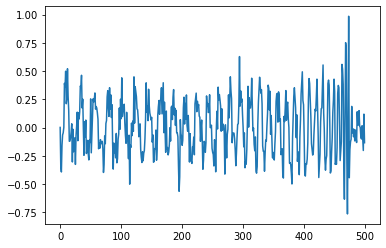

In [12]:
time=np.arange(0,500,1)
test=templ_ran(2.3,35,time)+np.random.normal(0,.12,len(time))
plt.plot(time,test)
plt.show()


We then want to find the time of merger

In [13]:
tsn=[]
for i in range(len(time)):
            tc=time[i]
            filt=templ(2.3,35,time,tc)
            val=(np.dot(filt,test))**2
            tsn.append(np.amax(val))

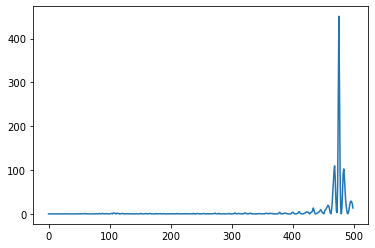

Time of merger is at: 476


In [14]:
plt.plot(time,tsn)
plt.show()
print('Time of merger is at:',time[np.where(tsn==np.amax(tsn))[0][0]])

We then try to recover all the other values as well, although we know them, this is just to test that we can find them. We use a small sample of values for mass and $\phi_c$ in order to minimize the time we have to run. We just need a close estimation to be ready for the real strains. 

In [15]:
#setting up the samples
mas=np.arange(1,100,2)
phiran=np.arange(0,2*np.pi,0.65)
print('Mass sampling:',len(mas))
print('phi_c sampling',len(phiran))
print('The total loop will be for:',len(mas)*len(phiran)*len(time))

Mass sampling: 50
phi_c sampling 10
The total loop will be for: 250000


In [16]:
sn=[]
for i in mas:
    for j in phiran:
        for k in range(len(time)):
            tc=time[k]
            filt=templ(j,i,time,tc)
            val=(np.dot(filt,test))**2
            sn.append(np.amax(val))
            
            

In [17]:
max_loc=np.where(sn==np.amax(sn))[0][0]
count=0
for i in mas:
    for j in phiran:
        for k in range(len(time)):
            count=count+1
            #print(count)
            if count==max_loc:
                break
        if count==max_loc:
            break
    if count==max_loc:
        break
mass_true=i
phi_c_true=j
time_true=time[k]
print ('mass:',mass_true)
print('phi_c:',phi_c_true)
print('time of merger:',time_true)
print(count,max_loc)

mass: 35
phi_c: 5.2
time of merger: 475
89476 89476


Now we will do some plotting. First plot is the S/N (t) for our best estimates for mass and $\phi_c$

In [18]:
tsn=[]
count=0
for i in mas:
    for j in phiran:
        for k in range(len(time)):
            if (i==mass_true) & (j==phi_c_true):
                tsn.append(sn[count])
            count=count+1

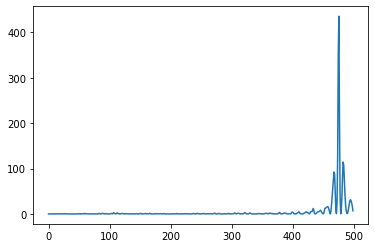

Time of merger is at: 476


In [19]:
plt.plot(time,tsn)
plt.show()
print('Time of merger is at:',time[np.where(tsn==np.amax(tsn))[0][0]])

Next is the probability plot for our parameters: Mass , $\phi_c$

In [20]:
mpsn=[]
count=0
for i in mas:
    psn=[]
    for j in phiran:
        ttsn=[]
        for k in range(len(time)):
            ttsn.append(sn[count])
            count=count+1
        psn.append(np.amax(ttsn))
    mpsn.append(psn)

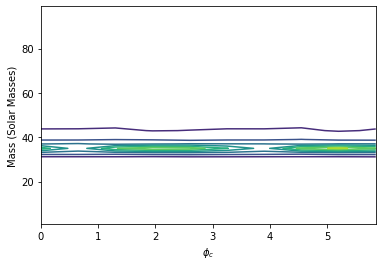

In [21]:
plt.contour(phiran,mas,mpsn)
#plt.ylim(30,40)
plt.ylabel('Mass (Solar Masses)')
plt.xlabel('$\phi_c$')
plt.show()

We are now ready to look in the data. First we need to load and print the data

In [22]:
c=np.loadtxt('AllWithNoise.dat').T
c.shape

(4, 3000)

In [23]:
time=c[0]
strain1=c[1]
strain2=c[2]
strain3=c[3]

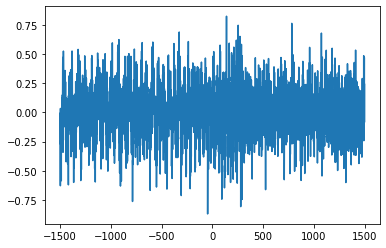

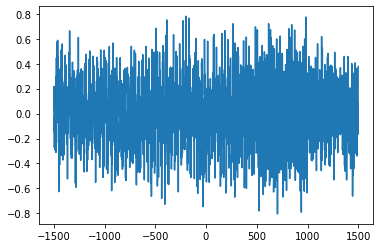

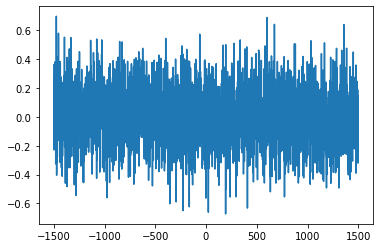

In [24]:
plt.plot(time,strain1)
plt.show()
plt.plot(time,strain2)
plt.show()
plt.plot(time,strain3)
plt.show()

We will now define the new sampling. This time we will be much more detailed, which also means more loops.

In [25]:
mas=np.arange(1,100,0.5)
phiran=np.arange(0,2*np.pi,0.2)
print('Mass sampling:',len(mas))
print('phi_c sampling',len(phiran))
print('The total loop will be for:',len(mas)*len(phiran)*len(time))

Mass sampling: 198
phi_c sampling 32
The total loop will be for: 19008000


First we will work on strain1

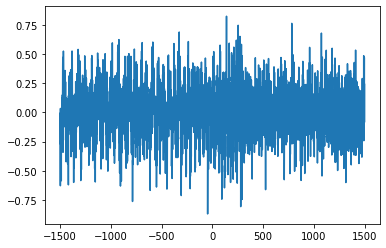

In [26]:
plt.plot(time,strain1)
plt.show()

In [27]:
sn_1=[]
for i in mas:
    for j in phiran:
        for k in range(len(time)):
            tc=time[k]
            filt=templ(j,i,time,tc)
            val=(np.dot(filt,strain1))**2
            sn_1.append(np.amax(val))
            
            

In [28]:
max_loc=np.where(sn_1==np.amax(sn_1))[0][0]
count=0
for i in mas:
    for j in phiran:
        for k in range(len(time)):
            count=count+1
            #print(count)
            if count==max_loc:
                break
        if count==max_loc:
            break
    if count==max_loc:
        break
mass_true_1=i
phi_c_true_1=j
time_true_1=time[k]
print ('mass:',mass_true_1)
print('phi_c:',phi_c_true_1)
print('time of merger:',time_true_1)
print(count,max_loc)

mass: 90.0
phi_c: 6.2
time of merger: 299.0
17182800 17182800


In [29]:
tsn_1=[]
count=0
for i in mas:
    for j in phiran:
        for k in range(len(time)):
            if (i==mass_true_1) & (j==phi_c_true_1):
                tsn_1.append(sn_1[count])
            count=count+1

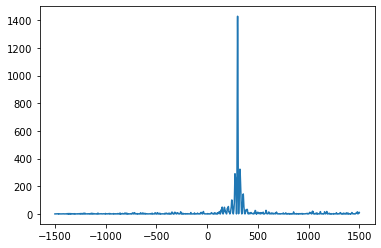

Time of merger is at: 300.0


In [30]:
plt.plot(time,tsn_1)
plt.show()
print('Time of merger is at:',time[np.where(tsn_1==np.amax(tsn_1))[0][0]])

In [31]:
mpsn_1=[]
count=0
for i in mas:
    psn=[]
    for j in phiran:
        ttsn=[]
        for k in range(len(time)):
            ttsn.append(sn_1[count])
            count=count+1
        psn.append(np.amax(ttsn))
    mpsn_1.append(psn)

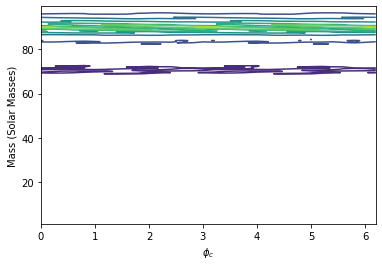

In [32]:
plt.contour(phiran,mas,mpsn_1)
#plt.ylim(30,40)
plt.ylabel('Mass (Solar Masses)')
plt.xlabel('$\phi_c$')
plt.show()

Now we will work on strain2

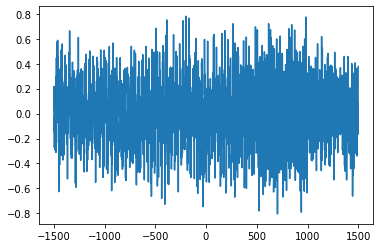

In [33]:
plt.plot(time,strain2)
plt.show()

In [34]:
sn_2=[]
for i in mas:
    for j in phiran:
        for k in range(len(time)):
            tc=time[k]
            filt=templ(j,i,time,tc)
            val=(np.dot(filt,strain2))**2
            sn_2.append(np.amax(val))
            
            

In [35]:
max_loc=np.where(sn_2==np.amax(sn_2))[0][0]
count=0
for i in mas:
    for j in phiran:
        for k in range(len(time)):
            count=count+1
            #print(count)
            if count==max_loc:
                break
        if count==max_loc:
            break
    if count==max_loc:
        break
mass_true_2=i
phi_c_true_2=j
time_true_2=time[k]
print ('mass:',mass_true_2)
print('phi_c:',phi_c_true_2)
print('time of merger:',time_true_2)
print(count,max_loc)

mass: 31.0
phi_c: 3.2
time of merger: 1000.0
5810501 5810501


In [36]:
tsn_2=[]
count=0
for i in mas:
    for j in phiran:
        for k in range(len(time)):
            if (i==mass_true_2) & (j==phi_c_true_2):
                tsn_2.append(sn_2[count])
            count=count+1

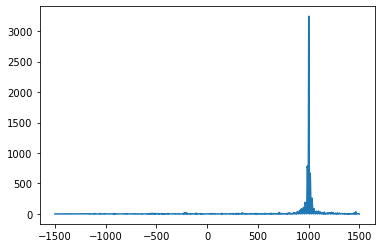

Time of merger is at: 1001.0


In [37]:
plt.plot(time,tsn_2)
plt.show()
print('Time of merger is at:',time[np.where(tsn_2==np.amax(tsn_2))[0][0]])

In [40]:
mpsn_2=[]
count=0
for i in mas:
    psn=[]
    for j in phiran:
        ttsn=[]
        for k in range(len(time)):
            ttsn.append(sn_2[count])
            count=count+1
        psn.append(np.amax(ttsn))
    mpsn_2.append(psn)

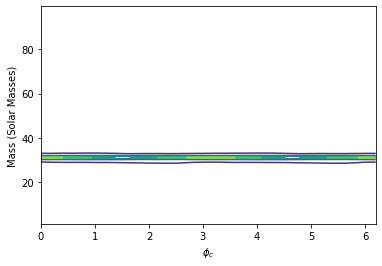

In [41]:
plt.contour(phiran,mas,mpsn_2)
#plt.ylim(30,40)
plt.ylabel('Mass (Solar Masses)')
plt.xlabel('$\phi_c$')
plt.show()

Now we will work on strain3

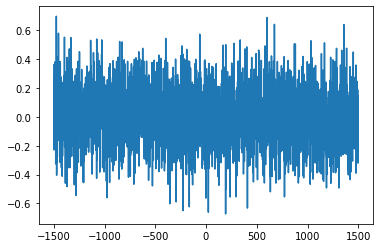

In [40]:
plt.plot(time,strain3)
plt.show()

In [41]:
sn_3=[]
for i in mas:
    for j in phiran:
        for k in range(len(time)):
            tc=time[k]
            filt=templ(j,i,time,tc)
            val=(np.dot(filt,strain3))**2
            sn_3.append(np.amax(val))
            
            

In [42]:
max_loc=np.where(sn_3==np.amax(sn_3))[0][0]
count=0
for i in mas:
    for j in phiran:
        for k in range(len(time)):
            count=count+1
            #print(count)
            if count==max_loc:
                break
        if count==max_loc:
            break
    if count==max_loc:
        break
mass_true_3=i
phi_c_true_3=j
time_true_3=time[k]
print ('mass:',mass_true_3)
print('phi_c:',phi_c_true_3)
print('time of merger:',time_true_3)
print(count,max_loc)

mass: 17.0
phi_c: 6.2
time of merger: 99.0
3166600 3166600


In [43]:
tsn_3=[]
count=0
for i in mas:
    for j in phiran:
        for k in range(len(time)):
            if (i==mass_true_3) & (j==phi_c_true_3):
                tsn_3.append(sn_3[count])
            count=count+1

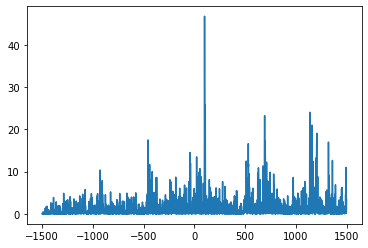

Time of merger is at: 100.0


In [44]:
plt.plot(time,tsn_3)
plt.show()
print('Time of merger is at:',time[np.where(tsn_3==np.amax(tsn_3))[0][0]])

In [60]:
mpsn_3=[]
count=0
for i in mas:
    psn=[]
    for j in phiran:
        ttsn=[]
        for k in range(len(time)):
            ttsn.append(sn_3[count])
            count=count+1
        psn.append(np.amax(ttsn))
    mpsn_3.append(psn)

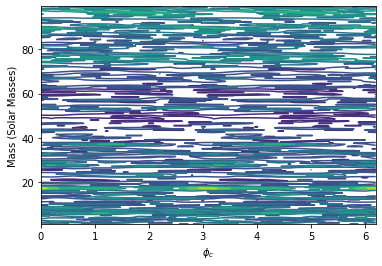

In [61]:
plt.contour(phiran,mas,mpsn_3)
#plt.ylim(30,40)
plt.ylabel('Mass (Solar Masses)')
plt.xlabel('$\phi_c$')
plt.show()

Save the results for meta-analysis

In [65]:
np.save('mass_sampling.npy',mas)
np.save('phi_sampling.npy',phiran)
np.save('sn_strain1.npy',sn_1)
np.save('time_sn_strain1.npy',tsn_1)
np.save('mass_phi_sn_strain1.npy',mpsn_1)
np.save('sn_strain2.npy',sn_2)
np.save('time_sn_strain2.npy',tsn_2)
np.save('mass_phi_sn_strain2.npy',mpsn_2)
np.save('sn_strain3.npy',sn_3)
np.save('time_sn_strain3.npy',tsn_3)
np.save('mass_phi_sn_strain3.npy',mpsn_3)

Meta-Analysis

In [1]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
t=np.arange(0,50,.1)
np.seterr(divide='ignore')
np.seterr(invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
#load all necessary arrays
c=np.loadtxt('AllWithNoise.dat').T
time=c[0]
strain1=c[1]
strain2=c[2]
strain3=c[3]
mas=np.load('mass_sampling.npy')
phiran=np.load('phi_sampling.npy')
sn_1=np.load('sn_strain1.npy')
tsn_1=np.load('time_sn_strain1.npy')
mpsn_1=np.load('mass_phi_sn_strain1.npy')
sn_2=np.load('sn_strain2.npy')
tsn_2=np.load('time_sn_strain2.npy')
mpsn_2=np.load('mass_phi_sn_strain2.npy')
sn_3=np.load('sn_strain3.npy')
tsn_3=np.load('time_sn_strain3.npy')
mpsn_3=np.load('mass_phi_sn_strain3.npy')

In [3]:
#the wave template
def templ(phi_c,x,t,tc):
    resul=np.nan_to_num((tc-t)**(-1/4)*np.cos(phi_c-39.11*x**(-5/8)*(tc-t)**(5/8)))
    resul[abs(resul)>10**(4)]=0
    return resul
    

Strain 1

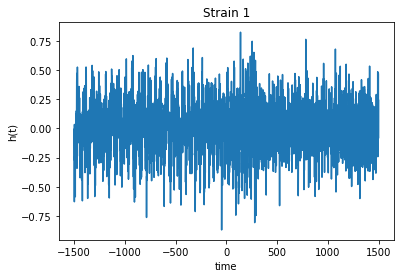

In [4]:
plt.plot(time,strain1)
plt.title('Strain 1')
plt.xlabel('time')
plt.ylabel('h(t)')
plt.show()

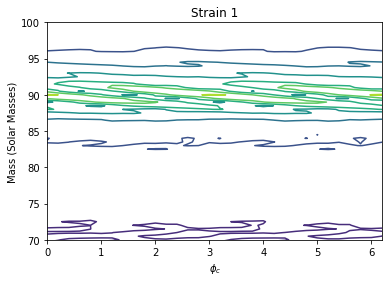

In [5]:
plt.contour(phiran,mas,mpsn_1)
plt.ylim(70,100)
plt.ylabel('Mass (Solar Masses)')
plt.xlabel('$\phi_c$')
plt.title('Strain 1')
plt.savefig('results/contour_1.pdf')
plt.show()

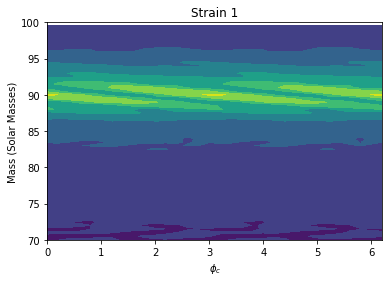

In [8]:
plt.contourf(phiran,mas,mpsn_1)
plt.ylim(70,100)
plt.ylabel('Mass (Solar Masses)')
plt.xlabel('$\phi_c$')
plt.title('Strain 1')
plt.savefig('results/contourf_1.pdf')
plt.show()

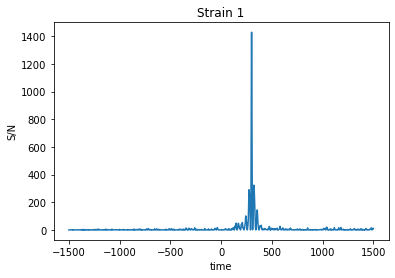

Time of merger is at: 300.0


In [9]:
plt.plot(time,tsn_1)
plt.title('Strain 1')
plt.xlabel('time')
plt.ylabel('S/N')
plt.savefig('results/time_merger_1.pdf')
plt.show()
print('Time of merger is at:',time[np.where(tsn_1==np.amax(tsn_1))[0][0]])

In [10]:
max_loc=np.where(sn_1==np.amax(sn_1))[0][0]
count=0
for i in mas:
    for j in phiran:
        for k in range(len(time)):
            count=count+1
            #print(count)
            if count==max_loc:
                break
        if count==max_loc:
            break
    if count==max_loc:
        break
mass_true_1=i
phi_c_true_1=j
time_true_1=time[k]
print ('mass:',mass_true_1)
print('phi_c:',phi_c_true_1)
print('time of merger:',time_true_1)
print(count,max_loc)

mass: 90.0
phi_c: 6.2
time of merger: 299.0
17182800 17182800


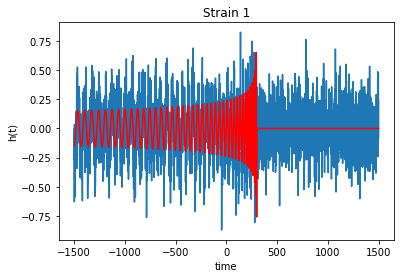

In [11]:
plt.plot(time,strain1)
plt.plot(time,templ(phi_c_true_1,mass_true_1,time,time_true_1),color='r')
plt.xlabel('time')
plt.ylabel('h(t)')
plt.title('Strain 1')
plt.savefig('results/wave_1.pdf')
plt.show()

Strain 2

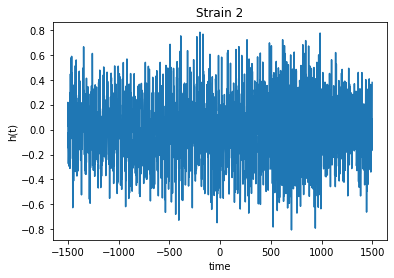

In [12]:
plt.plot(time,strain2)
plt.title('Strain 2')
plt.xlabel('time')
plt.ylabel('h(t)')
plt.show()

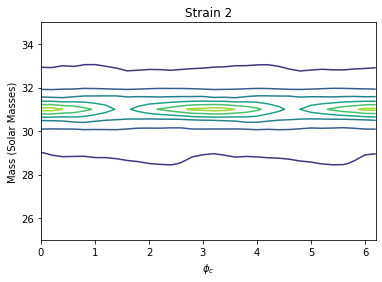

In [13]:
plt.contour(phiran,mas,mpsn_2)
plt.ylim(25,35)
plt.ylabel('Mass (Solar Masses)')
plt.xlabel('$\phi_c$')
plt.title('Strain 2')
plt.savefig('results/contour_2.pdf')
plt.show()

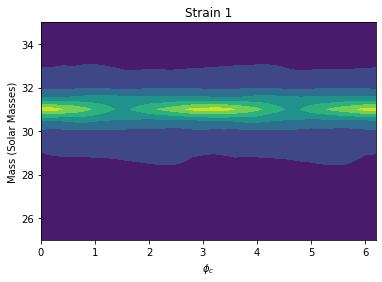

In [14]:
plt.contourf(phiran,mas,mpsn_2)
plt.ylim(25,35)
plt.ylabel('Mass (Solar Masses)')
plt.xlabel('$\phi_c$')
plt.title('Strain 1')
plt.savefig('results/contourf_2.pdf')
plt.show()

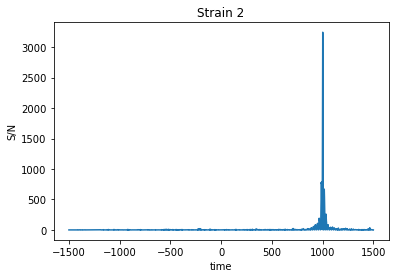

Time of merger is at: 1001.0


In [15]:
plt.plot(time,tsn_2)
plt.title('Strain 2')
plt.xlabel('time')
plt.ylabel('S/N')
plt.savefig('results/time_merger_2.pdf')
plt.show()
print('Time of merger is at:',time[np.where(tsn_2==np.amax(tsn_2))[0][0]])

In [16]:
max_loc=np.where(sn_2==np.amax(sn_2))[0][0]
count=0
for i in mas:
    for j in phiran:
        for k in range(len(time)):
            count=count+1
            #print(count)
            if count==max_loc:
                break
        if count==max_loc:
            break
    if count==max_loc:
        break
mass_true_2=i
phi_c_true_2=j
time_true_2=time[k]
print ('mass:',mass_true_2)
print('phi_c:',phi_c_true_2)
print('time of merger:',time_true_2)
print(count,max_loc)

mass: 31.0
phi_c: 3.2
time of merger: 1000.0
5810501 5810501


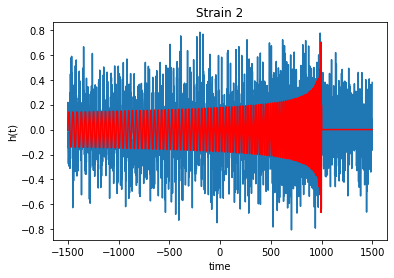

In [17]:
plt.plot(time,strain2)
plt.plot(time,templ(phi_c_true_2,mass_true_2,time,time_true_2),color='r')
plt.xlabel('time')
plt.ylabel('h(t)')
plt.title('Strain 2')
plt.savefig('results/wave_2.pdf')
plt.show()

Strain 3

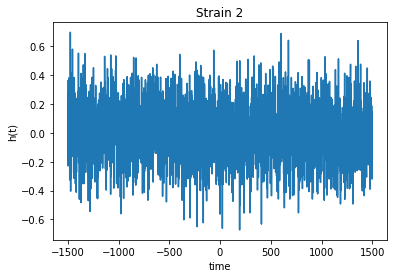

In [18]:
plt.plot(time,strain3)
plt.title('Strain 2')
plt.xlabel('time')
plt.ylabel('h(t)')
plt.show()

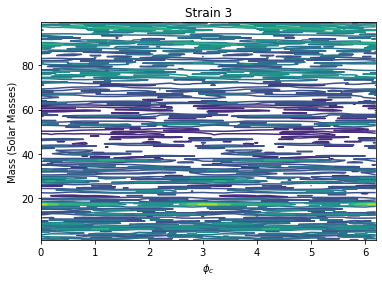

In [19]:
plt.contour(phiran,mas,mpsn_3)
plt.ylabel('Mass (Solar Masses)')
plt.xlabel('$\phi_c$')
plt.title('Strain 3')
plt.savefig('results/contour_3.pdf')
plt.show()

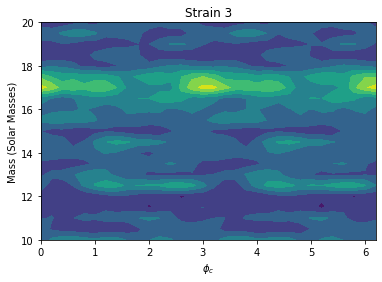

In [20]:
plt.contourf(phiran,mas,mpsn_3)
plt.ylim(10,20)
plt.ylabel('Mass (Solar Masses)')
plt.xlabel('$\phi_c$')
plt.title('Strain 3')
plt.savefig('results/contourf_3.pdf')
plt.show()

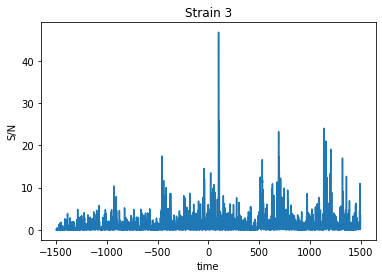

Time of merger is at: 100.0


In [21]:
plt.plot(time,tsn_3)
plt.title('Strain 3')
plt.xlabel('time')
plt.ylabel('S/N')
plt.savefig('results/time_merger_3.pdf')
plt.show()
print('Time of merger is at:',time[np.where(tsn_3==np.amax(tsn_3))[0][0]])

In [23]:
max_loc=np.where(sn_3==np.amax(sn_3))[0][0]
count=0
for i in mas:
    for j in phiran:
        for k in range(len(time)):
            count=count+1
            #print(count)
            if count==max_loc:
                break
        if count==max_loc:
            break
    if count==max_loc:
        break
mass_true_3=i
phi_c_true_3=j
time_true_3=time[k]
print ('mass:',mass_true_3)
print('phi_c:',phi_c_true_3)
print('time of merger:',time_true_3)
print(count,max_loc)

mass: 17.0
phi_c: 6.2
time of merger: 99.0
3166600 3166600
